#Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Mount the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing The Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OIBSIP Data Analytics/Twitter_Data.csv')

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.shape

(162980, 2)

In [ ]:
df.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


#Checking that weather there is a null values are there or not

In [ ]:
df.isnull().sum()

,0
clean_text,5
category,7


Checking the further duplicated values of the data

In [ ]:
df.duplicated().sum()

3

**Dropping the row entries **

In [ ]:
df = df.dropna(subset=['clean_text','category'])

In [ ]:
df.isnull().sum()

,0
clean_text,0
category,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
# Remove duplicated values
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

#Importing other libraries

In [ ]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

In [ ]:
# Feature Engineering using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']

**Training, Testing and Splitting the Dataset**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Plotting the Bar Graph for Sentiment Class Distribution and Sentiment Category value entries**

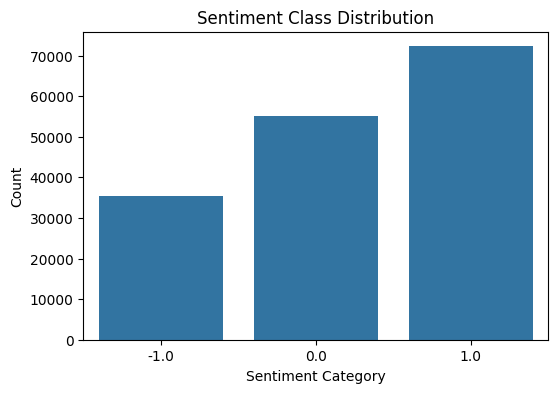

In [ ]:
# Visualizing class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

**Plotting a pie chart for class Distribution**

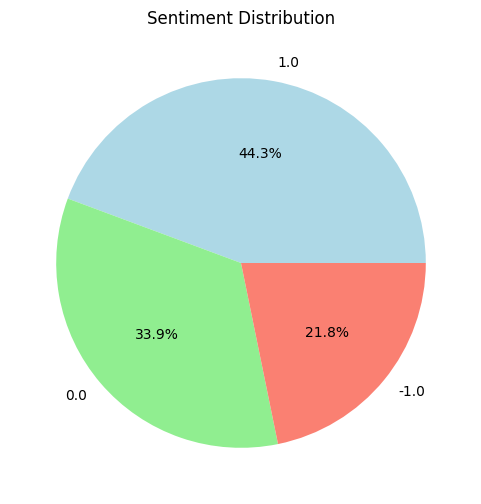

In [ ]:
# Pie chart for class distribution
plt.figure(figsize=(6, 6))
y.value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightgreen", "salmon"])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


**Deep Learning Architectures in Sentiment Analysis**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# Step 2: Encode Sentiment Labels into Numerical Categories
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])  # Convert text labels to numbers
num_classes = len(label_encoder.classes_)

In [ ]:
# Step 3: Tokenization & Padding
tokenizer = Tokenizer(num_words=5000)  # Keep the top 5000 words
tokenizer.fit_on_texts(df['clean_text'])

In [ ]:
sequences = tokenizer.texts_to_sequences(df['clean_text'])
max_length = max(len(seq) for seq in sequences)  # Find max sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['category'], test_size=0.2, random_state=42)

In [ ]:
# Convert labels to categorical format (One-hot encoding)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

**Building the LSTM (Long-Short Term Memory) Model in Deep Learning**

In [ ]:
# Step 5: Build LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),  # Embedding layer
    SpatialDropout1D(0.2),  # Helps prevent overfitting
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation='softmax')  # Output layer with softmax
])

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Step 6: Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 499s 121ms/step - accuracy: 0.7466 - loss: 0.6105 - val_accuracy: 0.9360 - val_loss: 0.2259
Epoch 2/5
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 504s 122ms/step - accuracy: 0.9408 - loss: 0.2084 - val_accuracy: 0.9535 - val_loss: 0.1759
Epoch 3/5
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 504s 122ms/step - accuracy: 0.9534 - loss: 0.1700 - val_accuracy: 0.9580 - val_loss: 0.1672
Epoch 4/5
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 515s 125ms/step - accuracy: 0.9590 - loss: 0.1501 - val_accuracy: 0.9563 - val_loss: 0.1683
Epoch 5/5
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 562s 125ms/step - accuracy: 0.9625 - loss: 0.1343 - val_accuracy: 0.9569 - val_loss: 0.1671


In [ ]:
# Step 7: Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9573 - loss: 0.1660
Test Accuracy: 95.69%


#Create a plot for model accuracy over epoches for LSTM

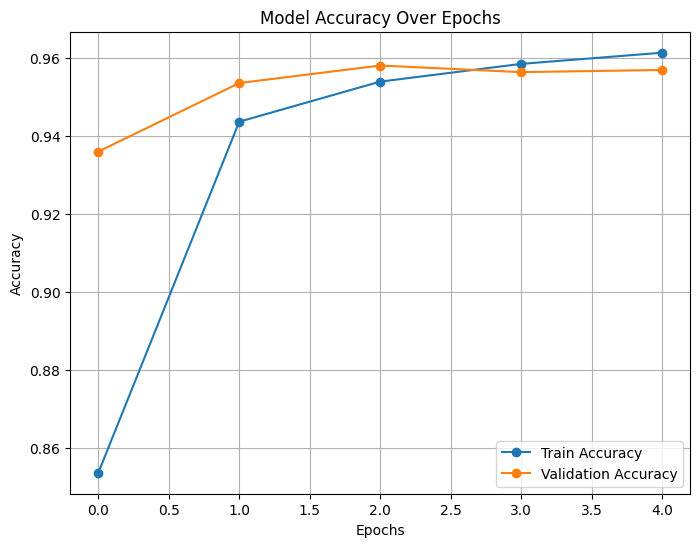

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training & validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call function after training
plot_accuracy(history)


#Create a plot for model loss over epoches

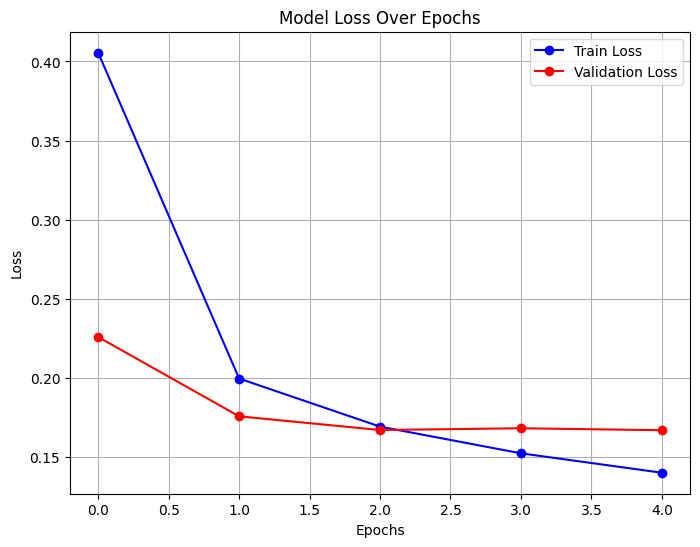

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training & validation loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss', marker='o', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', color='red')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call function after training
plot_loss(history)


#Simple Neural Network

In [ ]:
# Set vocab_length correctly
vocab_length = len(tokenizer.word_index) + 1
embedding_dim = 128  # Common values: 50, 100, 128, 300

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_length, output_dim=embedding_dim, input_length=100),  # No need for embedding_matrix
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.add(Embedding(input_dim=vocab_length, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Tokenization Parameters
VOCAB_SIZE = 5000     # Max number of words in vocabulary
MAX_LENGTH = 100      # Max length of input sequences
OOV_TOKEN = "<OOV>"   # Token for out-of-vocabulary words

# Neural Network Hyperparameters
EMBEDDING_DIM = 128   # Size of word embeddings
DENSE_UNITS_1 = 128   # Number of neurons in first Dense layer
DENSE_UNITS_2 = 64    # Number of neurons in second Dense layer
DROPOUT_RATE = 0.3    # Dropout rate to prevent overfitting

# Training Hyperparameters
EPOCHS = 10           # Number of epochs for training
BATCH_SIZE = 32       # Number of samples per batch
VALIDATION_SPLIT = 0.2  # Percentage of data used for validation


In [ ]:
# Build the Neural Network Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH),
    Flatten(),
    Dense(DENSE_UNITS_1, activation='relu'),
    Dropout(DROPOUT_RATE),
    Dense(DENSE_UNITS_2, activation='relu'),
    Dropout(DROPOUT_RATE),
    Dense(3, activation='softmax')  # Assuming 3 sentiment classes (Positive, Neutral, Negative)
])

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 93s 22ms/step - accuracy: 0.7850 - loss: 0.5409 - val_accuracy: 0.9331 - val_loss: 0.2338
Epoch 2/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 138s 21ms/step - accuracy: 0.9422 - loss: 0.2014 - val_accuracy: 0.9370 - val_loss: 0.2263
Epoch 3/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 141s 21ms/step - accuracy: 0.9598 - loss: 0.1329 - val_accuracy: 0.9354 - val_loss: 0.2634
Epoch 4/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 144s 22ms/step - accuracy: 0.9704 - loss: 0.0930 - val_accuracy: 0.9331 - val_loss: 0.3053
Epoch 5/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.9765 - loss: 0.0704 - val_accuracy: 0.9308 - val_loss: 0.3310
Epoch 6/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 85s 21ms/step - accuracy: 0.9812 - loss: 0.0588 - val_accuracy: 0.9233 - val_loss: 0.3825
Epoch 7/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 144s 21ms/step - accuracy: 0.9850 - loss: 0.0497 - val_accuracy: 0.9277 - val_loss: 0.4251
Epoch 8/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 143s 22ms/step - accuracy: 0.

In [ ]:
print(model.summary())

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 49, 128)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,354,187 (16.61 MB)

 Trainable params: 1,451,395 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,902,792 (11.07 MB)

None


**Prediction on test set including model performance**

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9229 - loss: 0.5667
Test Score: 0.5750763416290283
Test Accuracy: 0.9234215021133423


#Create a plot for model accuracy over epoches for Simple Neural Network

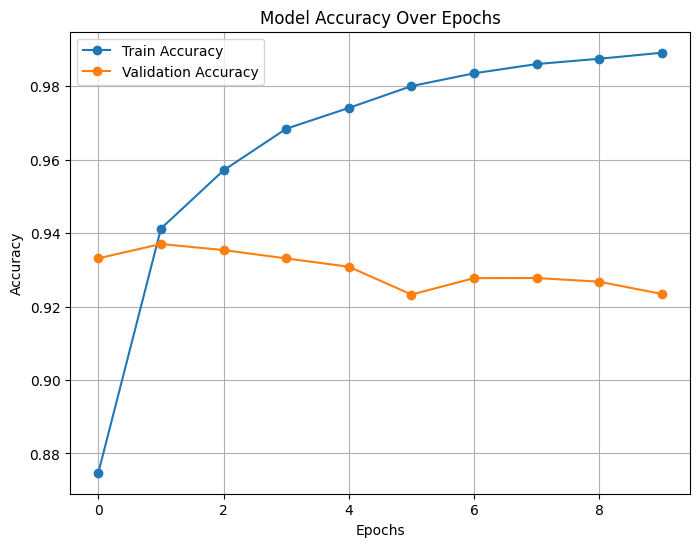

In [ ]:
# Function to plot training & validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call function after training
plot_accuracy(history)


#Create a plot for model loss over epoches for Simple Neural Network

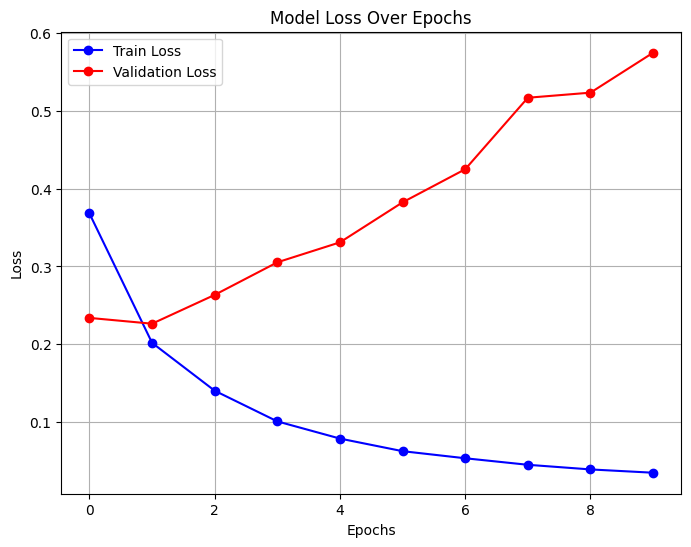

In [ ]:
# Function to plot training & validation loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss', marker='o', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', color='red')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call function after training
plot_loss(history)

#Convolutional Netral Network

In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
# Step 2: Encode Sentiment Labels into Numerical Categories
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])  # Convert text labels to numbers
num_classes = len(label_encoder.classes_)  # Number of sentiment classes

In [ ]:
# Step 3: Tokenization & Padding
VOCAB_SIZE = 5000      # Max number of words in vocabulary
MAX_LENGTH = 100       # Max length of input sequences

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH, padding='post')

In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['category'], test_size=0.2, random_state=42)

In [ ]:
# Convert labels to categorical (One-hot encoding)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

**Building the CNN Model**

In [ ]:
# Step 5: Build the CNN Model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=128, input_length=MAX_LENGTH),  # Embedding Layer
    Conv1D(128, 5, activation='relu'),    # 1D Convolution Layer
    MaxPooling1D(pool_size=4),            # Max-Pooling Layer
    Conv1D(128, 5, activation='relu'),    # 2nd Convolution Layer
    MaxPooling1D(pool_size=4),            # Max-Pooling Layer
    Flatten(),                            # Flatten the output for Dense layers
    Dense(128, activation='relu'),        # Dense Layer
    Dropout(0.5),                         # Dropout for regularization
    Dense(num_classes, activation='softmax')  # Output Layer (Softmax for multi-class classification)
])

In [ ]:
# Step 6: Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 286s 69ms/step - accuracy: 0.8226 - loss: 0.4666 - val_accuracy: 0.9497 - val_loss: 0.1823
Epoch 2/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 317s 68ms/step - accuracy: 0.9514 - loss: 0.1747 - val_accuracy: 0.9482 - val_loss: 0.1810
Epoch 3/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 279s 68ms/step - accuracy: 0.9615 - loss: 0.1340 - val_accuracy: 0.9477 - val_loss: 0.1972
Epoch 4/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 326s 69ms/step - accuracy: 0.9675 - loss: 0.1042 - val_accuracy: 0.9499 - val_loss: 0.2146
Epoch 5/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 279s 68ms/step - accuracy: 0.9754 - loss: 0.0765 - val_accuracy: 0.9385 - val_loss: 0.2456
Epoch 6/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 327s 70ms/step - accuracy: 0.9809 - loss: 0.0580 - val_accuracy: 0.9414 - val_loss: 0.2969
Epoch 7/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 319s 69ms/step - accuracy: 0.9827 - loss: 0.0504 - val_accuracy: 0.9412 - val_loss: 0.3250
Epoch 8/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 327s 70ms/step - accuracy: 

In [ ]:
print(model.summary())

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 20, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,659,595 (10.15 MB)

 Trainable params: 886,531 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,773,064 (6.76 MB)

None


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9321 - loss: 0.4126
Test Score: 0.42015397548675537
Test Accuracy: 0.932932436466217


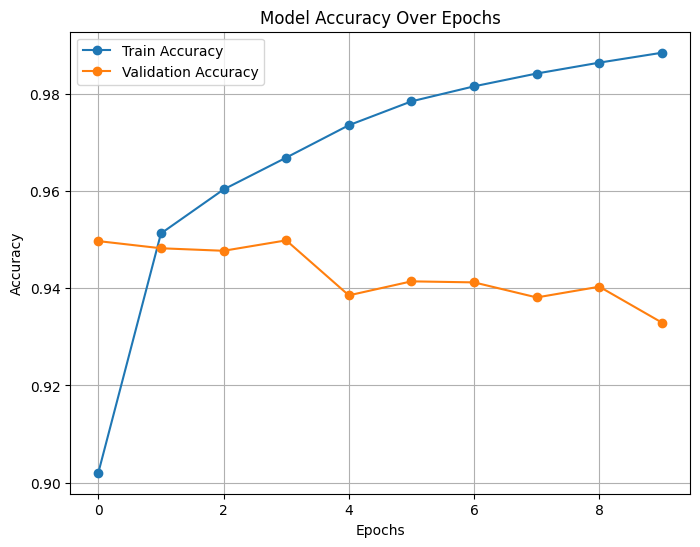

In [ ]:
# Function to plot training & validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call function after training
plot_accuracy(history)


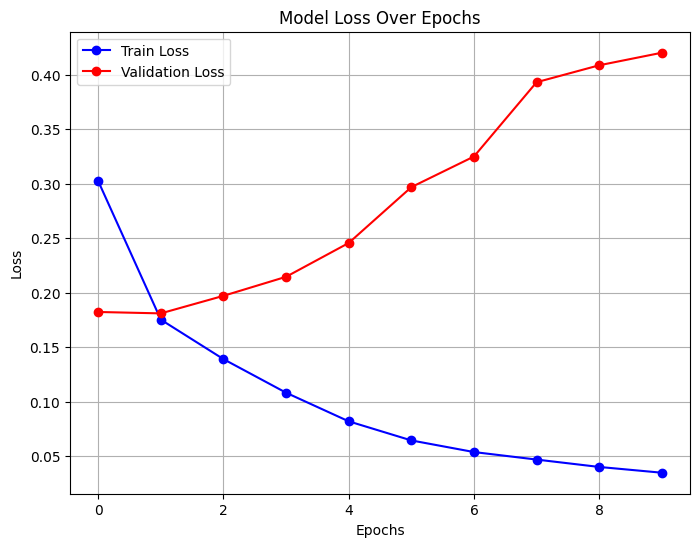

In [ ]:
# Function to plot training & validation loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss', marker='o', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', color='red')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call function after training
plot_loss(history)